# Association rules - Polish film actors, i.e. researching the role of connections in this guild
### Authors: Michał Woźniak (id: 385190), Michał Wrzesiński (id: 385197)
### Date: 30.12.2019

# 1. Introduction
## 1.1 Background
The world of economics is built on the basis of interpersonal relationships, they create space and motivate agents' activities. The science that extensively describes and explores these relationships is among others behavioral economics (which uses for instance the creation of Social Networks). This relatively new area has brought a new perspective on multi-agent modeling. <br><br> Going deeper, we are all aware of the role of human connections in our lives. They define and redefine a significant part of human life events. Some of them arise per se from the institution of the family (impact on social mobility ([Barone and Mocetti from 2015](https://www.eui.eu/Documents/DepartmentsCentres/Economics/Seminarsevents/Mocetti.pdf))), while some are generated by the man himself based on his decisions during his existence. Obviously connections might occur in many fields for example: politics ([Fisman from 2001](https://sites.bu.edu/fisman/files/2015/11/AER01-Suharto.pdf)), financial markets ([Harvison from 2019](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3387495)), job market etc. We have to be aware that, they can also penetrate each other.<br><br>
Unsupervised Learning can be useful group of tools for studying this problem. To be more specific we can utilize Association rules for analyzing relationships/connections between people. They allow us to know, understand and visualize relationships between people using simple statistical rules. In the past, scientists have successfully attempted such and similar analyzes [Mahoto et al. from 2014](https://link.springer.com/chapter/10.1007/978-3-319-10987-9_14).

## 1.2 Object and purpose of the study
In this paper authors would like to explore the issue of human connections in the labor market in the field of film acting. It is motivated by the fact that actors are creating very special, non trivial professional guild. We can call them somewhat freelancers. Each film is a separate project, after which they must search for a new offer on the job market. However, very often, as movie viewers, we feel that a given group of actors appear together on the cinema screen very often. Usually this is not a coincidence. This might be influenced by the producer and/or director. We can assume that reputation and opinion plays a very important role in this profession.<br><br>

During this research authors have focused especially on Polish filmography. Association rules require, in a way, that the objects subject to analysis come from one period (in order to be able to base the conclusion on the pseudo-homogeneity of agents), so scientists decided to focus on the most popular films which were produced during last decade (2010-2019) in Poland.<br><br>

To sum up, scientist were looking for association rules among polish film's actors. They want to check if their subjective feelings about the topic are in line with empirical analysis. The conclusions of this analysis can be used both as a source of knowledge in the field of behavioral economics and as tips for beginning actors.

## 1.3 Scientific hypothesis
The major hypothesis verified in this paper is: whether analyzing Polish films (and their actors) we can find patterns testifying to the existence of connections in this specific guild?

# 2. Methodology of the research

## 2.1 Association rules

### 2.1.1 Definition

tutaj definicja: regół asocjacyjnych oraz 4 podstawowych miar asocjacji

### 2.1.2 Algorithms

tutaj definicje: The Eclat Algorithm, The Apriori algorithm

## 2.2 Data

The researchers collected data on the cast of the most popular Polish films from 2010-2019. Information about the ranking of films and actors playing in them was derived from the Filmweb.pl portal. For further analysis, the authors needed to obtain the following data structure: list of lists, where the "mother" list aggregates knowledge at the film level, and each "child" list aggregates knowledge at the actor level.

To scrape data authors used Python and libraries like: Selenium and BeautifulSoup.<br>
<br>
In practice, downloading the necessary information for this analysis was not trivial. It requires a three-step approach. First, the HTML code of Polish film rankings for the years 2010-2019 was downloaded from the Filmweb using the Selenium library (this is dynamic page). Then the direct links to the movies were extracted from the above code (using BeautifulSoup). After modifying these links, they redirected directly to the cast of the given film. Eventually, the cast was scraped per film. Finally we obtained a "matrix" with 570 rows (movies) and their corresponding actors.

#### Dependencies loading

```python
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import xlsxwriter
```

Creating objects that store data.

```python
list_of_the_top_films_by_year = list() #list of links to the cast of each film
list_of_actors = list() #final list of the lists of actors
html_code = list() #list for HTML codes, elements of the list refer to the year of ranking
```

Scraping HTML codes of rankings for each year.

```python
driver = webdriver.Chrome()

for i in range(2010,2020):
    driver.get(f"https://www.filmweb.pl/ranking/film/Polska/42/{i}")
    time.sleep(2)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    html_code.append(driver.page_source)
```

Extracting and modifying links to the movies from above HTML code.

```python
for i in html_code:
    soup = BeautifulSoup(i, 'html.parser')
    for link in soup.findAll('a', {'class': 'film__link'}):
        try:
            list_of_the_top_films_by_year.append("https://www.filmweb.pl"+link['href']+"/cast")
        except:
            pass
```

Creating list of the lists of actors from cast web-pages.

```python
for i in list_of_the_top_films_by_year:
    tmp = list()
    web_page = requests.get(i)
    soup =  BeautifulSoup(web_page.text, 'html.parser')
    for j in soup.findAll('a', {'class': 'pImg46'}):
        tmp.append(j["title"])
    list_of_actors.append(tmp)
```

Applying some adjustments like: characters replacing, removing films without actors.

```python
list_of_actors_cleared = list()

for i in list_of_actors:
    if(len(i)!=0):
        tmp = list()
        for k in i:
            foo = k.replace(" ","_")
            foo = foo.replace("-","_")
            tmp.append(foo)
        list_of_actors_cleared.append(tmp)
```

Saving obtained dataset to the Excel file. After that Excel file was manually converted to CSV extension.

```python
with xlsxwriter.Workbook('datasets/dataset.xlsx') as workbook:
    worksheet = workbook.add_worksheet()
    for row_num, data in enumerate(list_of_actors_cleared):
        worksheet.write_row(row_num, 0, data)
```

## 2.3 Approach

The following steps were taken to conduct the study:
1. Explanatory Data Analysis of dataset
2. Cross Tables analysis
3. Eclat algorithm
4. 

# 3. Modeling

#### Dependencies loading

In [40]:
library(arules) #library dedicated to association rules analysis
library(arulesViz) #library dedicated to visualize association rules
library(repr) #library dedicated to r plots adjustments
options(warn=-1) #turn off warnings in R
options(repr.plot.width=15, repr.plot.height=7) #plotting options

#### Dataset loading

In [74]:
df <-read.transactions("datasets/dataset.csv", format="basket", sep=",", skip=0)

### Explanatory Data Analysis for dataset

Dataset has 567 rows (unique films) and 11659 unique columns (unique actors).

In [75]:
items(df)

itemMatrix in sparse format with
 567 rows (elements/transactions) and
 11659 columns (items)

Below we posted random three rows (itemsets/films) from our dataset.

In [82]:
LIST(df[sample(nrow(df), 2), ])

[[1]]
 [1] "Andrzej_Blumenfeld"     "Andrzej_Stanaszek"      "Antoni_Janik"          
 [4] "Filip_Pławiak"          "Jon_Digby"              "Lech_Mackiewicz"       
 [7] "Lee_Ross"               "Lianne_Harvey"          "Małgorzata_Mikołajczak"
[10] "Mark_Wakeling"          "Robert_Mika"            "Ruby_Bentall"          
[13] "Tilly_Gaunt"            "Tomasz_Kot"            

[[2]]
 [1] "Aleksandra_Góralczyk"    "Aleksandra_Hamkało"     
 [3] "Anna_Mucha"              "Barbara_Zielińska"      
 [5] "Dariusz_Toczek"          "Elżbieta_Romanowska"    
 [7] "Ewa_Kasprzyk"            "Grażyna_Błęcka_Kolska"  
 [9] "Jakub_Kucner"            "Jerzy_Rogalski"         
[11] "Joanna_Jarmołowicz"      "Katarzyna_Łaniewska"    
[13] "Katarzyna_Skrzynecka"    "Maciej_Zakościelny"     
[15] "Małgorzata_Rożniatowska" "Mariusz_Winnicki"       
[17] "Mateusz_Grydlik"         "Mayu_Gralińska_Sakai"   
[19] "Michalina_Sosna"         "Mikołaj_Roznerski"      
[21] "Monika_Dryl"             "Nikodem_Rozbicki"       
[23] "Noel_Horta"              "Paweł_Jawor"            
[25] "Paweł_Nowisz"            "Piotr_Strycharski"      
[27] "Robert_Klatt"            "Ryszard_Warot"          
[29] "Sandra_Róg"              "Wiktor_Zborowski"       
[31] "Wojciech_Solarz"         "Yoilan_Harriette"       
[33] "Zdzisław_Wardejn"        "Zenon_Martyniuk"

Analysis of the distribution of the number of actors in the movies is also significant part.
We can obtain information that minimal number of actors in our movies is equal to 1 and maximal number is 195. Median and mean are respectively: 28 and 35.06. We can suspect that distribution is right-skewed.

In [76]:
summary(size(df))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   14.00   28.00   35.06   48.00  195.00 

To investigate this part deeply we have plotted histogram. We commit that distribution is right-skewed. In Poland, productions involving a small number of actors dominate, however, there are also high-budget films that employ over 100 actors. Interestingly, there are no movies above 200 actors.

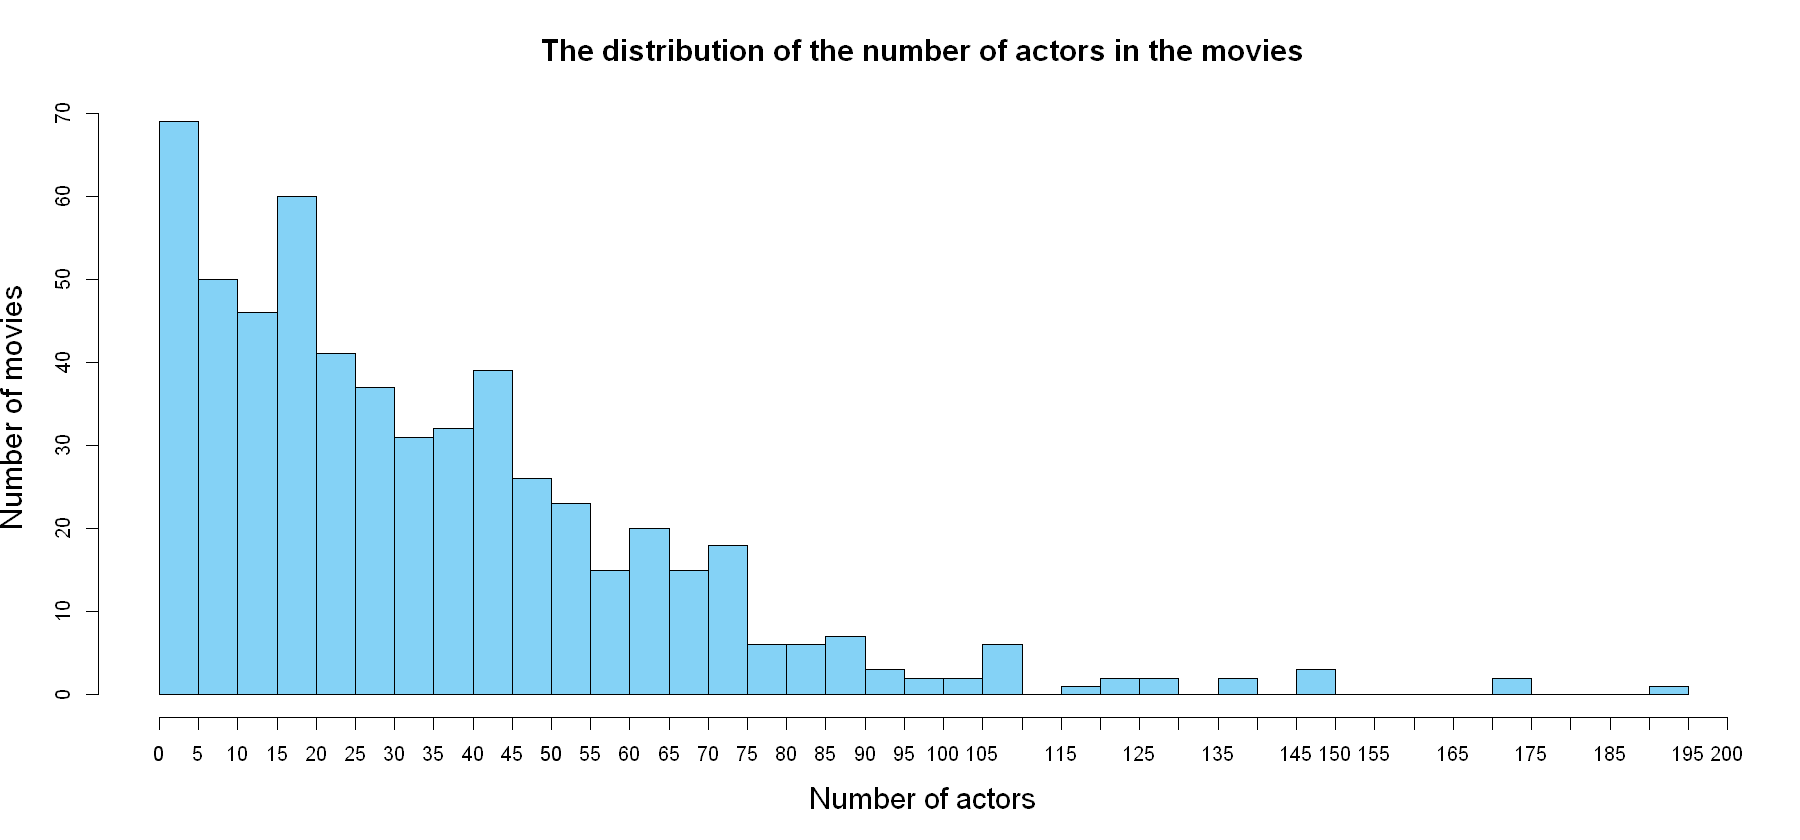

In [109]:
hist(size(df),breaks=50,col="#84D2F6",main = "The distribution of the number of actors in the movies", xlab = "Number of actors",ylab = "Number of movies",cex.lab=1.5, cex.main=1.5, cex.sub=1.5)
axis(1, at=seq(0,200,by=5))

We also checked how many actors occur in the datasets more than once (they played multiple times). This number is 8219. They will be the main subject of this analysis.

In [78]:
sum(size(df)) - ncol(df)

[1] 8219

Very important information provides analysis of frequency of items (actors) in dataset. We obtained information who played the most. In Polish top 5 we have got: Janusz Chabior, Piotr Głowacki, Łukasz Simlat, Marian Dziędziel and Przemysław Bluszcz.  

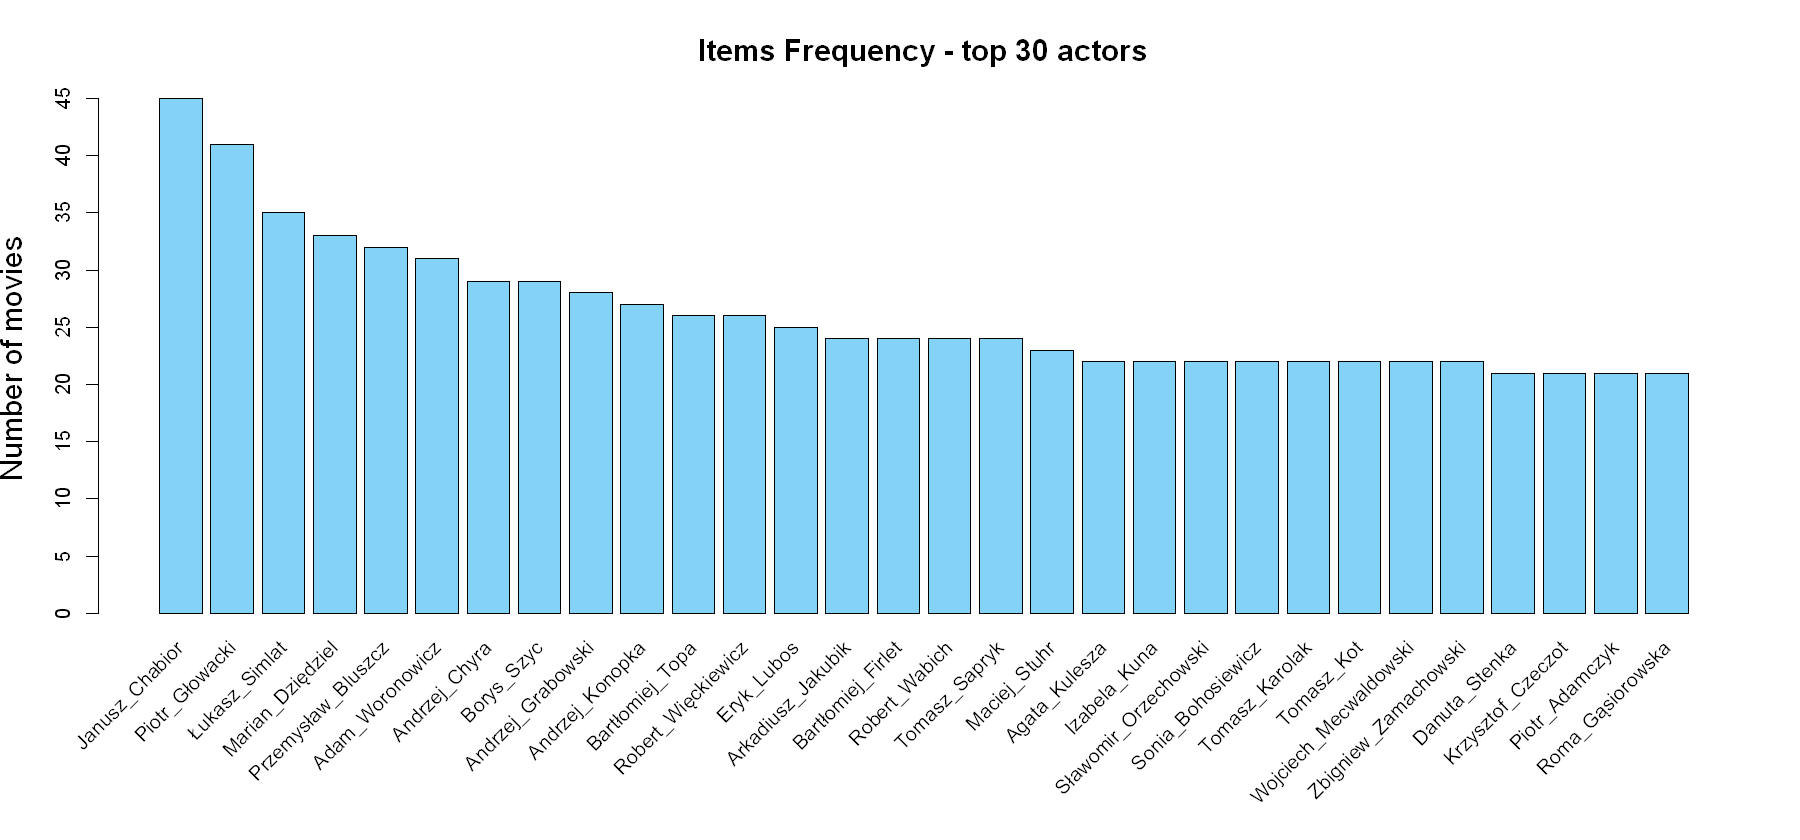

In [110]:
itemFrequencyPlot(df, topN=30, col="#84D2F6", type="absolute", main="Items Frequency - top 30 actors", cex.names=1 ,ylab = "Number of movies",cex.lab=1.5, cex.main=1.5, cex.sub=1.5)
axis(2, at=seq(0,60,by=5))

Authors also check how these plots looks for 500 top actors. Of course it is not fully legible, but shows the distribution of the number of roles played per actor. It is clear that there is a group of actors who play a lot, but those a little less popular also play a lot. The number of roles played falls quite smoothly (no significant spikes apparent).

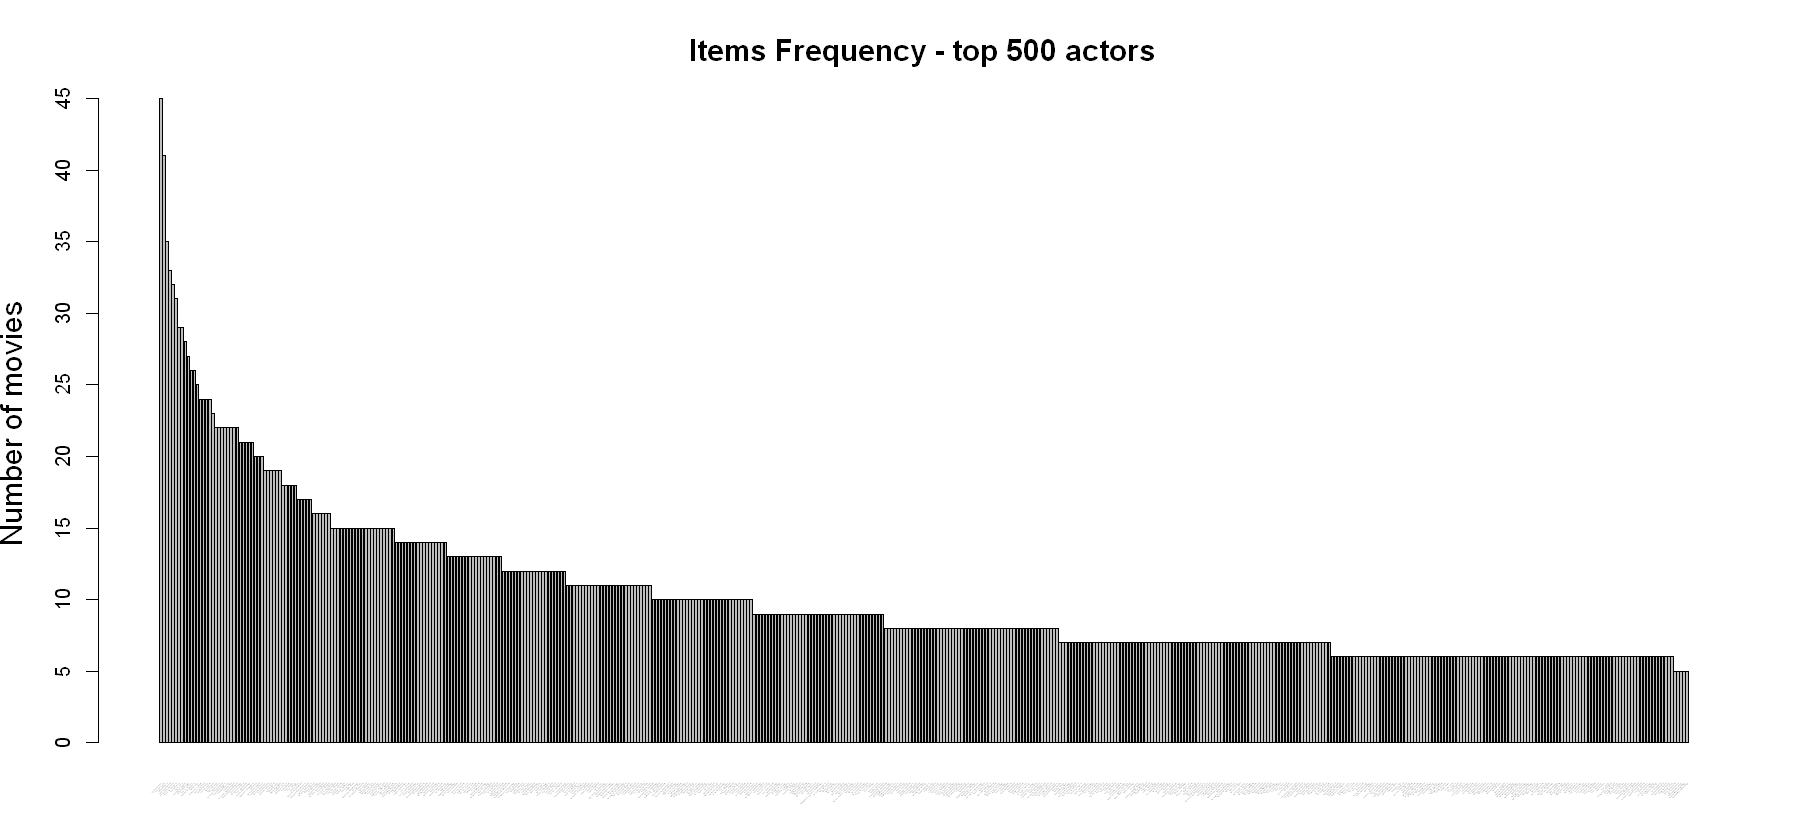

In [113]:
itemFrequencyPlot(df, topN=500, type="absolute", main="Items Frequency - top 500 actors", cex.names=0.001 ,ylab = "Number of movies",cex.lab=1.5, cex.main=1.5, cex.sub=1.5)
axis(2, at=seq(0,60,by=5))

Relative items frequency plot for top 30 actors shows the percentage share of roles played by the actors from the general pool of films, for instance Janusz Chabior played in 7.8% possible films. It's a decent score!

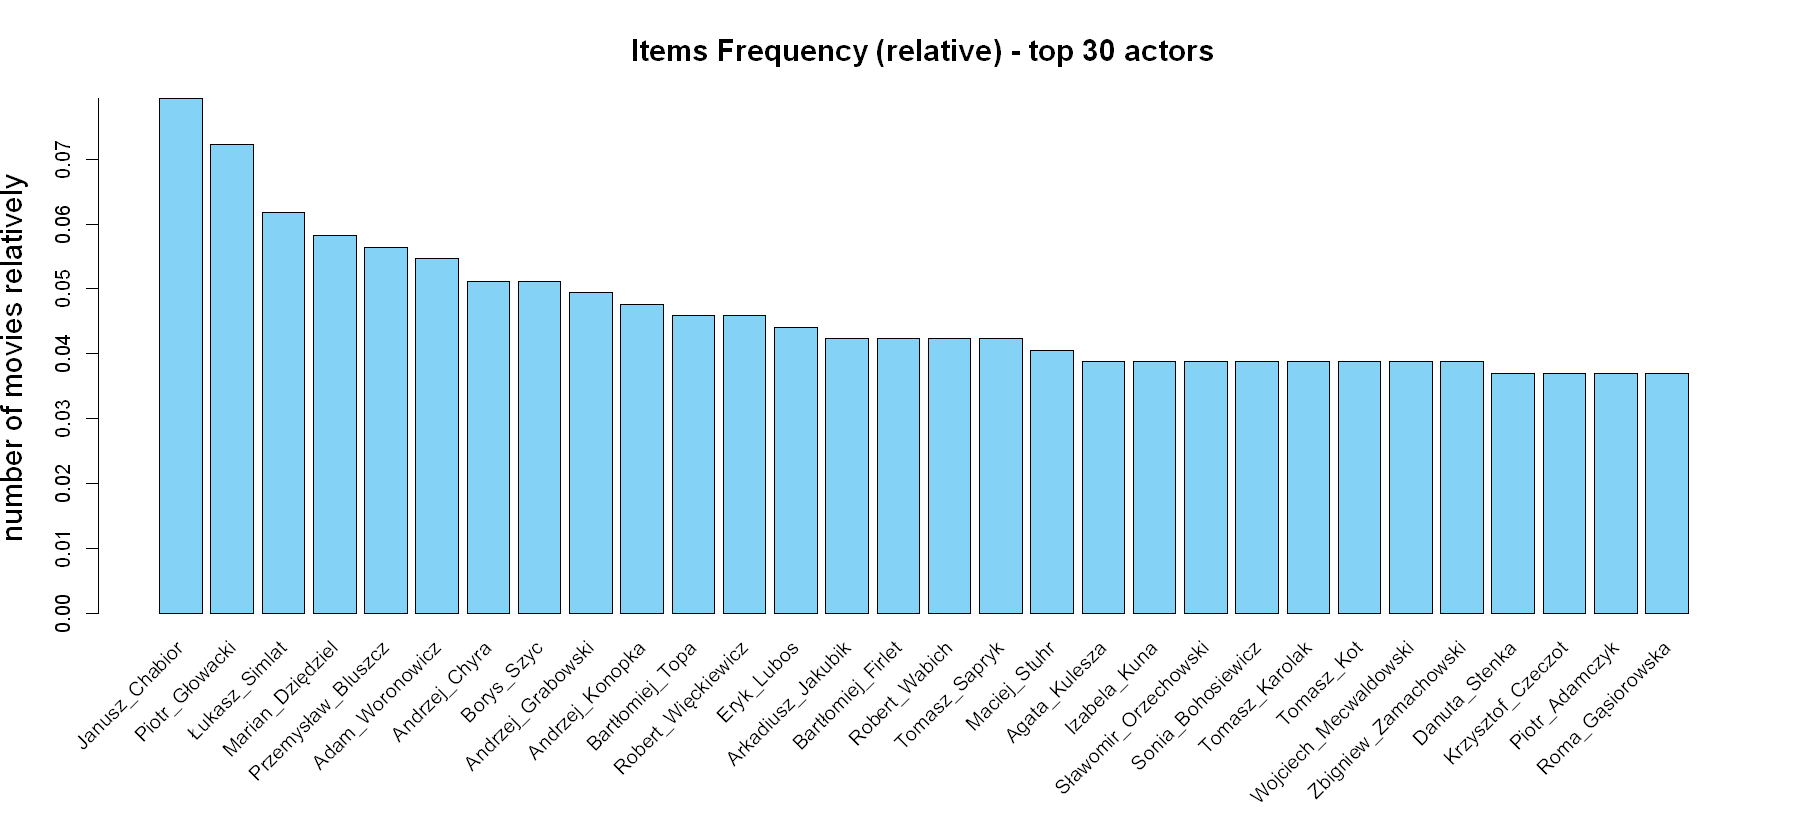

In [112]:
itemFrequencyPlot(df, topN=30,col="#84D2F6", type="relative", main="Items Frequency (relative) - top 30 actors", cex.names=1 ,ylab = "number of movies relatively",cex.lab=1.5, cex.main=1.5, cex.sub=1.5)
axis(2, at=seq(0,0.2,by=0.01))

Top 10 actors (according to frequency) and their relative frequency:

In [42]:
head(sort(itemFrequency(df), decreasing=TRUE), n=10)

Janusz_Chabior     Piotr_Głowacki      Łukasz_Simlat   Marian_Dziędziel 
        0.07894737         0.07192982         0.06140351         0.05789474 
Przemysław_Bluszcz    Adam_Woronowicz      Andrzej_Chyra         Borys_Szyc 
        0.05614035         0.05438596         0.05087719         0.05087719 
 Andrzej_Grabowski    Andrzej_Konopka 
        0.04912281         0.04736842

The above analysis suggests that the reliable metrics in the analysis will be: Confidence and Lift, while Support, due to the specifics of the dataset, will not play a significant role here.

### Cross Table

Simple cross tables of count and lift may also provide some interesting information about relations between actors.

Count cross table shows who acted with whom and how much, for example Eryk Lubos acted 6 times with Marian Dziędziel. Already in such a simple analysis you can see that the most popular actors play quite often together (10 years period). The highest count is 8.

In [115]:
crossTable(df, measure="count", sort=TRUE)[1:20,1:20]

,Janusz_Chabior,Piotr_Głowacki,Łukasz_Simlat,Marian_Dziędziel,Przemysław_Bluszcz,Adam_Woronowicz,Andrzej_Chyra,Borys_Szyc,Andrzej_Grabowski,Andrzej_Konopka,Bartłomiej_Topa,Robert_Więckiewicz,Eryk_Lubos,Arkadiusz_Jakubik,Bartłomiej_Firlet,Robert_Wabich,Tomasz_Sapryk,Maciej_Stuhr,Agata_Kulesza,Izabela_Kuna
Janusz_Chabior,45,6,5,5,5,8,3,3,6,1,2,3,8,3,4,4,3,3,3,4
Piotr_Głowacki,6,41,5,4,4,3,2,4,2,4,3,4,3,2,2,5,2,6,4,3
Łukasz_Simlat,5,5,35,6,4,4,5,3,2,3,5,4,3,2,1,3,3,1,4,6
Marian_Dziędziel,5,4,6,33,4,7,2,4,5,2,6,5,6,4,2,8,4,4,8,6
Przemysław_Bluszcz,5,4,4,4,32,3,0,2,2,3,4,4,3,3,2,2,5,3,4,2
Adam_Woronowicz,8,3,4,7,3,31,1,2,3,4,3,6,4,3,1,4,4,2,6,3
Andrzej_Chyra,3,2,5,2,0,1,29,1,3,3,2,2,2,4,1,1,1,3,0,1
Borys_Szyc,3,4,3,4,2,2,1,29,5,1,2,1,1,1,4,2,3,2,1,3
Andrzej_Grabowski,6,2,2,5,2,3,3,5,28,1,2,2,4,3,5,3,3,3,4,5
Andrzej_Konopka,1,4,3,2,3,4,3,1,1,27,4,3,2,3,1,5,1,1,3,3


Lift shows the chance of a pair of actors appearing together in a movie, relative to the product of the probability of the actors starring in two different movies. The higher the lift, the greater the chance of such an event. The highest lift belongs to pair: Eryk Lubos and Arkadiusz Jakubik (4.75). Importantly, it is clear that most of the observed lifts is over 1, which implies strong relationships between actors (the probability that they will play together rather than alone).

In [125]:
crossTable(df, measure="lift", sort=TRUE)[1:20,1:20]

,Janusz_Chabior,Piotr_Głowacki,Łukasz_Simlat,Marian_Dziędziel,Przemysław_Bluszcz,Adam_Woronowicz,Andrzej_Chyra,Borys_Szyc,Andrzej_Grabowski,Andrzej_Konopka,Bartłomiej_Topa,Robert_Więckiewicz,Eryk_Lubos,Arkadiusz_Jakubik,Bartłomiej_Firlet
Janusz_Chabior,NA,1.8536585,1.8095238,1.919192,1.979167,3.2688172,1.3103448,1.3103448,2.7142857,0.4691358,0.9743590,1.4615385,4.0533333,1.5833333,2.1111111
Piotr_Głowacki,1.8536585,NA,1.9860627,1.685144,1.737805,1.3453973,0.9587889,1.9175778,0.9930314,2.0596206,1.6041276,2.1388368,1.6682927,1.1585366,1.1585366
Łukasz_Simlat,1.8095238,1.9860627,NA,2.961039,2.035714,2.1013825,2.8078818,1.6847291,1.1632653,1.8095238,3.1318681,2.5054945,1.9542857,1.3571429,0.6785714
Marian_Dziędziel,1.9191919,1.6851441,2.9610390,NA,2.159091,3.9002933,1.1912226,2.3824451,3.0844156,1.2794613,3.9860140,3.3216783,4.1454545,2.8787879,1.4393939
Przemysław_Bluszcz,1.9791667,1.7378049,2.0357143,2.159091,NA,1.7237903,0.0000000,1.2284483,1.2723214,1.9791667,2.7403846,2.7403846,2.1375000,2.2265625,1.4843750
Adam_Woronowicz,3.2688172,1.3453973,2.1013825,3.900293,1.723790,NA,0.6340378,1.2680756,1.9700461,2.7240143,2.1215881,4.2431762,2.9419355,2.2983871,0.7661290
Andrzej_Chyra,1.3103448,0.9587889,2.8078818,1.191223,0.000000,0.6340378,NA,0.6777646,2.1059113,2.1839080,1.5119363,1.5119363,1.5724138,3.2758621,0.8189655
Borys_Szyc,1.3103448,1.9175778,1.6847291,2.382445,1.228448,1.2680756,0.6777646,NA,3.5098522,0.7279693,1.5119363,0.7559682,0.7862069,0.8189655,3.2758621
Andrzej_Grabowski,2.7142857,0.9930314,1.1632653,3.084416,1.272321,1.9700461,2.1059113,3.5098522,NA,0.7539683,1.5659341,1.5659341,3.2571429,2.5446429,4.2410714
Andrzej_Konopka,0.4691358,2.0596206,1.8095238,1.279461,1.979167,2.7240143,2.1839080,0.7279693,0.7539683,NA,3.2478632,2.4358974,1.6888889,2.6388889,0.8796296


### Eclat algorithm

The Eclat algorithm is used to mine frequent itemsets. It is based on support metric. In case of our analysis it is a big disadvantage, because specificity of data forces very low support. However, an attempt was made to use this algorithm to find frequent patterns in this dataset.

In [132]:
freq.items <- eclat(df, parameter=list(supp=0.045))

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE   0.045      1     10 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 25 

create itemset ... 
set transactions ...[11659 item(s), 567 transaction(s)] done [0.01s].
sorting and recoding items ... [12 item(s)] done [0.00s].
creating sparse bit matrix ... [12 row(s), 567 column(s)] done [0.00s].
writing  ... [12 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].


If minimal support is equal to 0.045 the most frequent itemsets correspond to the most frequent items. Let's try different minimal support to find itemsets with more than 1 item.

In [133]:
inspect(freq.items,sort=true)

     items                support    count
[1]  {Piotr_Głowacki}     0.07231041 41   
[2]  {Janusz_Chabior}     0.07936508 45   
[3]  {Borys_Szyc}         0.05114638 29   
[4]  {Marian_Dziędziel}   0.05820106 33   
[5]  {Andrzej_Grabowski}  0.04938272 28   
[6]  {Adam_Woronowicz}    0.05467372 31   
[7]  {Przemysław_Bluszcz} 0.05643739 32   
[8]  {Bartłomiej_Topa}    0.04585538 26   
[9]  {Łukasz_Simlat}      0.06172840 35   
[10] {Robert_Więckiewicz} 0.04585538 26   
[11] {Andrzej_Konopka}    0.04761905 27   
[12] {Andrzej_Chyra}      0.05114638 29   


Now let's try to use Eclat with minimal support equal to 0.01 and minimal length of itemset equal to 2.

In [149]:
freq.items <- eclat(df, parameter=list(supp=0.01,minlen=2))

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE    0.01      2     10 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 5 

create itemset ... 
set transactions ...[11659 item(s), 567 transaction(s)] done [0.01s].
sorting and recoding items ... [495 item(s)] done [0.00s].
creating sparse bit matrix ... [495 row(s), 567 column(s)] done [0.00s].
writing  ... [55 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


We obtained 55 itemsets in such a case.

In [150]:
inspect(freq.items,sort=true)

     items                                              support    count
[1]  {Marek_Kalita,Przemysław_Bluszcz}                  0.01058201 6    
[2]  {Łukasz_Simlat,Piotr_Tołoczko}                     0.01058201 6    
[3]  {Agata_Kulesza,Roman_Gancarczyk}                   0.01234568 7    
[4]  {Przemysław_Bluszcz,Wiesław_Cichy}                 0.01058201 6    
[5]  {Marcin_Juchniewicz,Robert_Wabich}                 0.01058201 6    
[6]  {Gabriela_Muskała,Łukasz_Simlat}                   0.01058201 6    
[7]  {Tomasz_Oświeciński,Wojciech_Kalinowski}           0.01058201 6    
[8]  {Anita_Poddębniak,Dariusz_Chojnacki}               0.01234568 7    
[9]  {Janusz_Chabior,Wojciech_Machnicki}                0.01058201 6    
[10] {Andrzej_Deskur,Piotr_Głowacki}                    0.01058201 6    
[11] {Filip_Guźla,Tomasz_Oświeciński}                   0.01058201 6    
[12] {Piotr_Głowacki,Rafał_Iwaniuk}                     0.01058201 6    
[13] {Janusz_Chabior,Rafał_Iwaniuk}                

Finally we can run Eclat with support equal to 0.008 and minimal length equal to 3. These results seem to be the most interesting.

In [147]:
freq.items <- eclat(df, parameter=list(supp=0.008,minlen=3))

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE   0.008      3     10 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 4 

create itemset ... 
set transactions ...[11659 item(s), 567 transaction(s)] done [0.01s].
sorting and recoding items ... [690 item(s)] done [0.00s].
creating sparse bit matrix ... [690 row(s), 567 column(s)] done [0.00s].
writing  ... [7 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


As we can see below, we have got 7 itemsets which meet the set limits. These are the most popular groups of actors. The number of movies played together is high (5 or more).

In [148]:
inspect(freq.items,sort=true)

    items                                                support     count
[1] {Arkadiusz_Jakubik,Michał_Gadomski,Robert_Wabich}    0.008818342 5    
[2] {Filip_Guźla,Tomasz_Oświeciński,Wojciech_Kalinowski} 0.008818342 5    
[3] {Filip_Guźla,Robert_Szewczyk,Tomasz_Oświeciński}     0.008818342 5    
[4] {Filip_Guźla,Piotr_Stramowski,Tomasz_Oświeciński}    0.008818342 5    
[5] {Agata_Kulesza,Marcin_Dorociński,Marian_Dziędziel}   0.010582011 6    
[6] {Marcin_Dorociński,Marian_Dziędziel,Robert_Wabich}   0.008818342 5    
[7] {Arkadiusz_Jakubik,Izabela_Kuna,Robert_Wabich}       0.008818342 5    


In [153]:
freq.rules<-ruleInduction(freq.items, df, confidence=0.75)
inspect(head(freq.rules))

    lhs                                     rhs                  support   
[1] {Wojciech_Kalinowski}                => {Tomasz_Oświeciński} 0.01058201
[2] {Wojciech_Machnicki}                 => {Janusz_Chabior}     0.01058201
[3] {Filip_Guźla}                        => {Tomasz_Oświeciński} 0.01058201
[4] {Marcin_Dorociński,Marian_Dziędziel} => {Agata_Kulesza}      0.01058201
[5] {Agata_Kulesza,Marian_Dziędziel}     => {Marcin_Dorociński}  0.01058201
[6] {Agata_Kulesza,Marcin_Dorociński}    => {Marian_Dziędziel}   0.01058201
    confidence lift     itemset
[1] 0.7500000  28.35000  7     
[2] 0.7500000   9.45000  9     
[3] 0.8571429  32.40000 11     
[4] 0.7500000  19.32955 16     
[5] 0.7500000  21.26250 16     
[6] 1.0000000  17.18182 16     


In [24]:
rules <- apriori(df, 
    parameter = list(support = 0.01, confidence = 0.2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11659 item(s), 570 transaction(s)] done [0.01s].
sorting and recoding items ... [495 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [80 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [25]:
summary(rules)

set of 80 rules

rule length distribution (lhs + rhs):sizes
 2  3 
77  3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.038   2.000   3.000 

summary of quality measures:
    support          confidence          lift            count    
 Min.   :0.01053   Min.   :0.2069   Min.   : 2.714   Min.   :6.0  
 1st Qu.:0.01053   1st Qu.:0.2500   1st Qu.: 5.668   1st Qu.:6.0  
 Median :0.01053   Median :0.3182   Median : 6.483   Median :6.0  
 Mean   :0.01123   Mean   :0.3680   Mean   : 9.079   Mean   :6.4  
 3rd Qu.:0.01228   3rd Qu.:0.4286   3rd Qu.: 9.764   3rd Qu.:7.0  
 Max.   :0.01404   Max.   :1.0000   Max.   :32.571   Max.   :8.0  

mining info:
 data ntransactions support confidence
   df           570    0.01        0.2

In [117]:
round(crossTable(df, measure="chiSquared", sort=TRUE)[1:20,1:20],2)

,Janusz_Chabior,Piotr_Głowacki,Łukasz_Simlat,Marian_Dziędziel,Przemysław_Bluszcz,Adam_Woronowicz,Andrzej_Chyra,Borys_Szyc,Andrzej_Grabowski,Andrzej_Konopka,Bartłomiej_Topa,Robert_Więckiewicz,Eryk_Lubos,Arkadiusz_Jakubik,Bartłomiej_Firlet,Robert_Wabich,Tomasz_Sapryk,Maciej_Stuhr,Agata_Kulesza,Izabela_Kuna
Janusz_Chabior,NA,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.01
Piotr_Głowacki,0.00,NA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.01,0.00
Łukasz_Simlat,0.00,0.00,NA,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03
Marian_Dziędziel,0.00,0.00,0.01,NA,0.00,0.03,0.00,0.01,0.01,0.00,0.02,0.01,0.03,0.01,0.00,0.06,0.01,0.01,0.06,0.03
Przemysław_Bluszcz,0.00,0.00,0.00,0.00,NA,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.00
Adam_Woronowicz,0.02,0.00,0.00,0.03,0.00,NA,0.00,0.00,0.00,0.01,0.00,0.03,0.01,0.00,0.00,0.01,0.01,0.00,0.03,0.00
Andrzej_Chyra,0.00,0.00,0.01,0.00,0.00,0.00,NA,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
Borys_Szyc,0.00,0.00,0.00,0.01,0.00,0.00,0.00,NA,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01
Andrzej_Grabowski,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.02,NA,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.01,0.01,0.02
Andrzej_Konopka,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,NA,0.01,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.01,0.01


In [26]:
inspect(head(sort(rules, by ="confidence"),5))

    lhs                                     rhs                  support   
[1] {Agata_Kulesza,Marcin_Dorociński}    => {Marian_Dziędziel}   0.01052632
[2] {Filip_Guźla}                        => {Tomasz_Oświeciński} 0.01052632
[3] {Wojciech_Kalinowski}                => {Tomasz_Oświeciński} 0.01052632
[4] {Wojciech_Machnicki}                 => {Janusz_Chabior}     0.01052632
[5] {Marcin_Dorociński,Marian_Dziędziel} => {Agata_Kulesza}      0.01052632
    confidence lift     count
[1] 1.0000000  17.27273 6    
[2] 0.8571429  32.57143 6    
[3] 0.7500000  28.50000 6    
[4] 0.7500000   9.50000 6    
[5] 0.7500000  19.43182 6    


In [27]:
inspect(head(sort(rules, by ="lift"),5))

    lhs                                 rhs                   support   
[1] {Filip_Guźla}                    => {Tomasz_Oświeciński}  0.01052632
[2] {Tomasz_Oświeciński}             => {Filip_Guźla}         0.01052632
[3] {Wojciech_Kalinowski}            => {Tomasz_Oświeciński}  0.01052632
[4] {Tomasz_Oświeciński}             => {Wojciech_Kalinowski} 0.01052632
[5] {Agata_Kulesza,Marian_Dziędziel} => {Marcin_Dorociński}   0.01052632
    confidence lift     count
[1] 0.8571429  32.57143 6    
[2] 0.4000000  32.57143 6    
[3] 0.7500000  28.50000 6    
[4] 0.4000000  28.50000 6    
[5] 0.7500000  21.37500 6    


In [28]:
inspect(head(sort(rules, by ="support"),5))

    lhs                    rhs                 support    confidence lift    
[1] {Marcin_Dorociński} => {Marian_Dziędziel}  0.01403509 0.4000000  6.909091
[2] {Marian_Dziędziel}  => {Marcin_Dorociński} 0.01403509 0.2424242  6.909091
[3] {Agata_Kulesza}     => {Marian_Dziędziel}  0.01403509 0.3636364  6.280992
[4] {Marian_Dziędziel}  => {Agata_Kulesza}     0.01403509 0.2424242  6.280992
[5] {Eryk_Lubos}        => {Janusz_Chabior}    0.01403509 0.3200000  4.053333
    count
[1] 8    
[2] 8    
[3] 8    
[4] 8    
[5] 8    


In [29]:
inspect(head(sort(rules, by ="count"),5))

    lhs                    rhs                 support    confidence lift    
[1] {Marcin_Dorociński} => {Marian_Dziędziel}  0.01403509 0.4000000  6.909091
[2] {Marian_Dziędziel}  => {Marcin_Dorociński} 0.01403509 0.2424242  6.909091
[3] {Agata_Kulesza}     => {Marian_Dziędziel}  0.01403509 0.3636364  6.280992
[4] {Marian_Dziędziel}  => {Agata_Kulesza}     0.01403509 0.2424242  6.280992
[5] {Eryk_Lubos}        => {Janusz_Chabior}    0.01403509 0.3200000  4.053333
    count
[1] 8    
[2] 8    
[3] 8    
[4] 8    
[5] 8    


Warning message in plot.rules(rules, measure = c("support", "confidence"), shading = "lift", :
"The parameter interactive is deprecated. Use engine='interactive' instead."To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


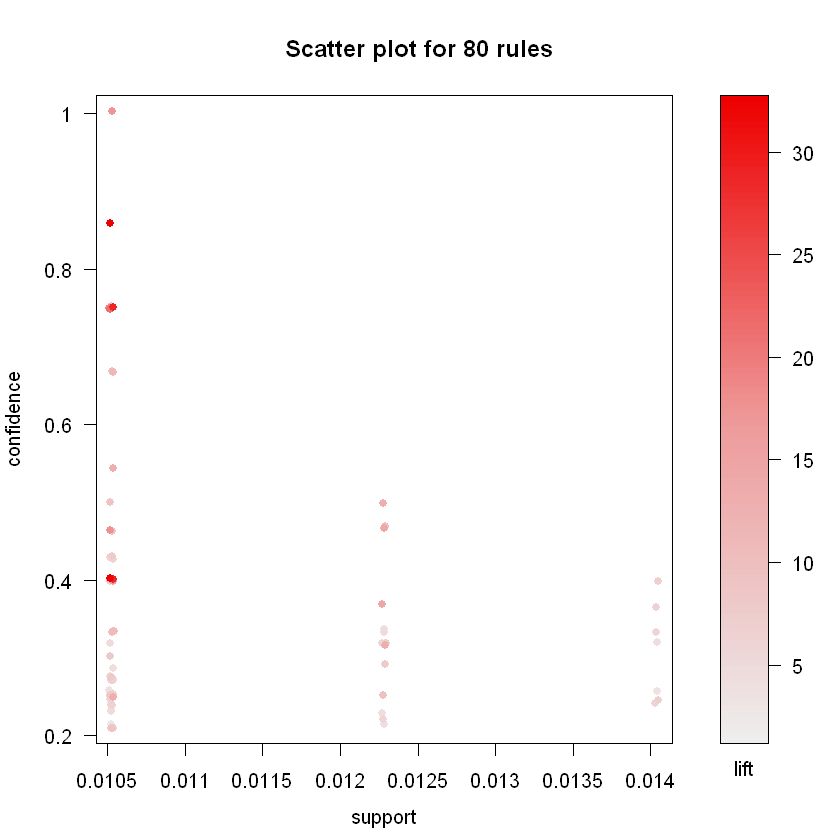

In [30]:
plot(rules, measure=c("support", "confidence"), shading="lift", interactive=FALSE)

In [110]:
6/570

[1] 0.01052632

In [111]:
7/570

[1] 0.0122807

In [113]:
rules1 <- apriori(df, 
    parameter = list(support = 0.01, confidence = 0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11659 item(s), 570 transaction(s)] done [0.01s].
sorting and recoding items ... [495 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [11 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


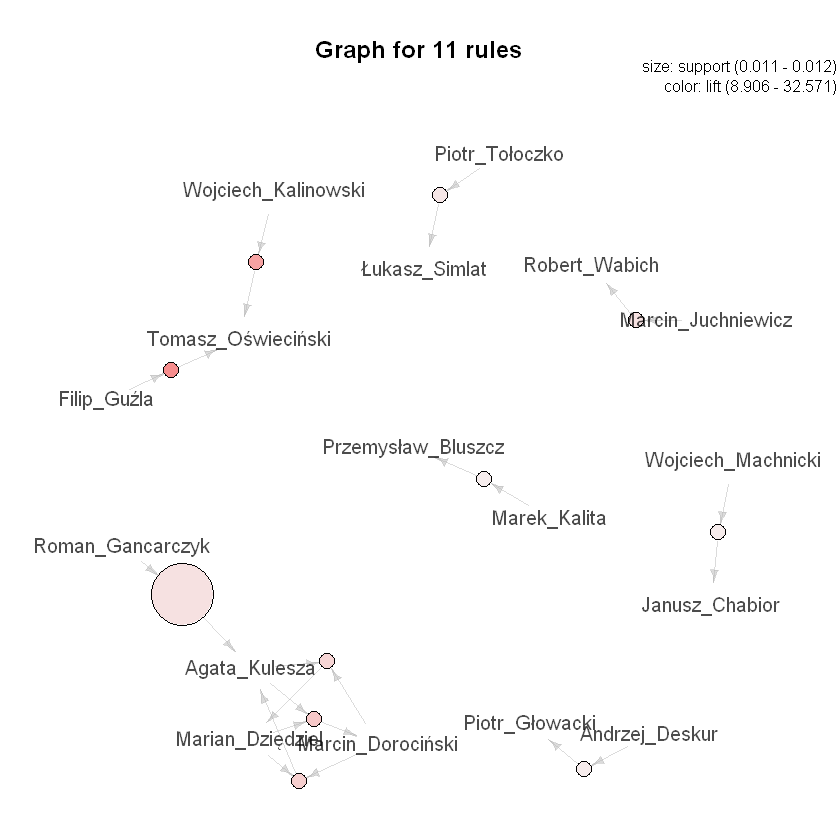

In [114]:
plot(rules1, method="graph")

In [129]:
rules <- apriori(df, 
    parameter = list(support = 0.01, confidence = 0.01))

chabior.rules <- sort(subset(rules, subset = rhs %in% "Janusz_Chabior"), 
                   by = "confidence")

summary(chabior.rules)
inspect(chabior.rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.01    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11659 item(s), 570 transaction(s)] done [0.01s].
sorting and recoding items ... [495 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [606 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 8 rules

rule length distribution (lhs + rhs):sizes
1 2 
1 7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   1.875   2.000   2.000 

summary of quality measures:
    support          confidence           lift           count      
 Min.   :0.01053   Min.   :0.07895   Min.   :1.000   Min.   : 6.00  
 1st Qu.:0.01053   1st Qu.:0.19730   1st Qu.:2.499   1st Qu.: 6.00  
 Median :0.01053   Median :0.28903   Median :3.661   Median : 6.00  
 Mean   :0.01996   Mean   :0.32453   Mean   :4.111   Mean   :11.38  
 3rd Qu.:0.01404   3rd Qu.:0.40714   3rd Qu.:5.157   3rd Qu.: 8.00  
 Max.   :0.07895   Max.   :0.75000   Max.   :9.500   Max.   :45.00  

mining info:
 data ntransactions support confidence
   df           570    0.01       0.01

    lhs                     rhs              support    confidence lift    
[1] {Wojciech_Machnicki} => {Janusz_Chabior} 0.01052632 0.75000000 9.500000
[2] {Rafał_Iwaniuk}      => {Janusz_Chabior} 0.01052632 0.42857143 5.428571
[3] {Tomasz_Oświeciński} => {Janusz_Chabior} 0.01052632 0.40000000 5.066667
[4] {Eryk_Lubos}         => {Janusz_Chabior} 0.01403509 0.32000000 4.053333
[5] {Adam_Woronowicz}    => {Janusz_Chabior} 0.01403509 0.25806452 3.268817
[6] {Andrzej_Grabowski}  => {Janusz_Chabior} 0.01052632 0.21428571 2.714286
[7] {Piotr_Głowacki}     => {Janusz_Chabior} 0.01052632 0.14634146 1.853659
[8] {}                   => {Janusz_Chabior} 0.07894737 0.07894737 1.000000
    count
[1]  6   
[2]  6   
[3]  6   
[4]  8   
[5]  8   
[6]  6   
[7]  6   
[8] 45   


In [130]:
rules <- apriori(df, 
    parameter = list(support = 0.01, confidence = 0.01))

chabior.rules <- sort(subset(rules, subset = rhs %in% "Piotr_Głowacki"), 
                   by = "confidence")

summary(chabior.rules)
inspect(chabior.rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.01    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11659 item(s), 570 transaction(s)] done [0.01s].
sorting and recoding items ... [495 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [606 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 13 rules

rule length distribution (lhs + rhs):sizes
 1  2 
 1 12 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   1.923   2.000   2.000 

summary of quality measures:
    support          confidence           lift           count   
 Min.   :0.01053   Min.   :0.07193   Min.   :1.000   Min.   : 6  
 1st Qu.:0.01053   1st Qu.:0.28571   1st Qu.:3.972   1st Qu.: 6  
 Median :0.01053   Median :0.33333   Median :4.634   Median : 6  
 Mean   :0.01579   Mean   :0.34396   Mean   :4.782   Mean   : 9  
 3rd Qu.:0.01228   3rd Qu.:0.42857   3rd Qu.:5.958   3rd Qu.: 7  
 Max.   :0.07193   Max.   :0.66667   Max.   :9.268   Max.   :41  

mining info:
 data ntransactions support confidence
   df           570    0.01       0.01

     lhs                        rhs              support    confidence lift    
[1]  {Andrzej_Deskur}        => {Piotr_Głowacki} 0.01052632 0.66666667 9.268293
[2]  {Zbigniew_Konopka}      => {Piotr_Głowacki} 0.01228070 0.46666667 6.487805
[3]  {Rafał_Iwaniuk}         => {Piotr_Głowacki} 0.01052632 0.42857143 5.958188
[4]  {Krzysztof_Dracz}       => {Piotr_Głowacki} 0.01052632 0.42857143 5.958188
[5]  {Marek_Kossakowski}     => {Piotr_Głowacki} 0.01052632 0.42857143 5.958188
[6]  {Sebastian_Stankiewicz} => {Piotr_Głowacki} 0.01228070 0.33333333 4.634146
[7]  {Roma_Gąsiorowska}      => {Piotr_Głowacki} 0.01228070 0.33333333 4.634146
[8]  {Sonia_Bohosiewicz}     => {Piotr_Głowacki} 0.01228070 0.31818182 4.423503
[9]  {Artur_Krajewski}       => {Piotr_Głowacki} 0.01052632 0.31578947 4.390244
[10] {Krzysztof_Czeczot}     => {Piotr_Głowacki} 0.01052632 0.28571429 3.972125
[11] {Maciej_Stuhr}          => {Piotr_Głowacki} 0.01052632 0.26086957 3.626723
[12] {Janusz_Chabior}        => {Piotr_G

In [131]:
rules <- apriori(df, 
    parameter = list(support = 0.01, confidence = 0.01))

chabior.rules <- sort(subset(rules, subset = rhs %in% "Agata_Kulesza"), 
                   by = "confidence")

summary(chabior.rules)
inspect(chabior.rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.01    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11659 item(s), 570 transaction(s)] done [0.01s].
sorting and recoding items ... [495 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [606 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 7 rules

rule length distribution (lhs + rhs):sizes
1 2 3 
1 5 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       2       2       2       2       3 

summary of quality measures:
    support          confidence          lift            count       
 Min.   :0.01053   Min.   :0.0386   Min.   : 1.000   Min.   : 6.000  
 1st Qu.:0.01053   1st Qu.:0.2168   1st Qu.: 5.616   1st Qu.: 6.000  
 Median :0.01053   Median :0.2424   Median : 6.281   Median : 6.000  
 Mean   :0.01529   Mean   :0.3235   Mean   : 8.382   Mean   : 8.714  
 3rd Qu.:0.01316   3rd Qu.:0.4000   3rd Qu.:10.364   3rd Qu.: 7.500  
 Max.   :0.03860   Max.   :0.7500   Max.   :19.432   Max.   :22.000  

mining info:
 data ntransactions support confidence
   df           570    0.01       0.01

    lhs                                     rhs             support   
[1] {Marcin_Dorociński,Marian_Dziędziel} => {Agata_Kulesza} 0.01052632
[2] {Roman_Gancarczyk}                   => {Agata_Kulesza} 0.01228070
[3] {Marcin_Dorociński}                  => {Agata_Kulesza} 0.01052632
[4] {Marian_Dziędziel}                   => {Agata_Kulesza} 0.01403509
[5] {Eryk_Lubos}                         => {Agata_Kulesza} 0.01052632
[6] {Adam_Woronowicz}                    => {Agata_Kulesza} 0.01052632
[7] {}                                   => {Agata_Kulesza} 0.03859649
    confidence lift      count
[1] 0.75000000 19.431818  6   
[2] 0.50000000 12.954545  7   
[3] 0.30000000  7.772727  6   
[4] 0.24242424  6.280992  8   
[5] 0.24000000  6.218182  6   
[6] 0.19354839  5.014663  6   
[7] 0.03859649  1.000000 22   


In [16]:
rules <- apriori(df, 
    parameter = list(support = 0.006, confidence = 0.5))

chabior.rules <- sort(subset(rules, subset = rhs %in% "Janusz_Chabior"), 
                   by = "count")

# summary(chabior.rules)
inspect(chabior.rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.006      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11659 item(s), 570 transaction(s)] done [0.01s].
sorting and recoding items ... [939 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [601 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                       rhs                  support confidence      lift count
[1] {Wojciech_Machnicki}   => {Janusz_Chabior} 0.010526316  0.7500000  9.500000     6
[2] {Grzegorz_Milczarczyk} => {Janusz_Chabior} 0.007017544  0.6666667  8.444444     4
[3] {Bartosz_Obuchowi

In [17]:
is.significant(chabior.rules, df) 

[1]  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [18]:
is.maximal(chabior.rules) 

[1] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [19]:
is.redundant(chabior.rules) 

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


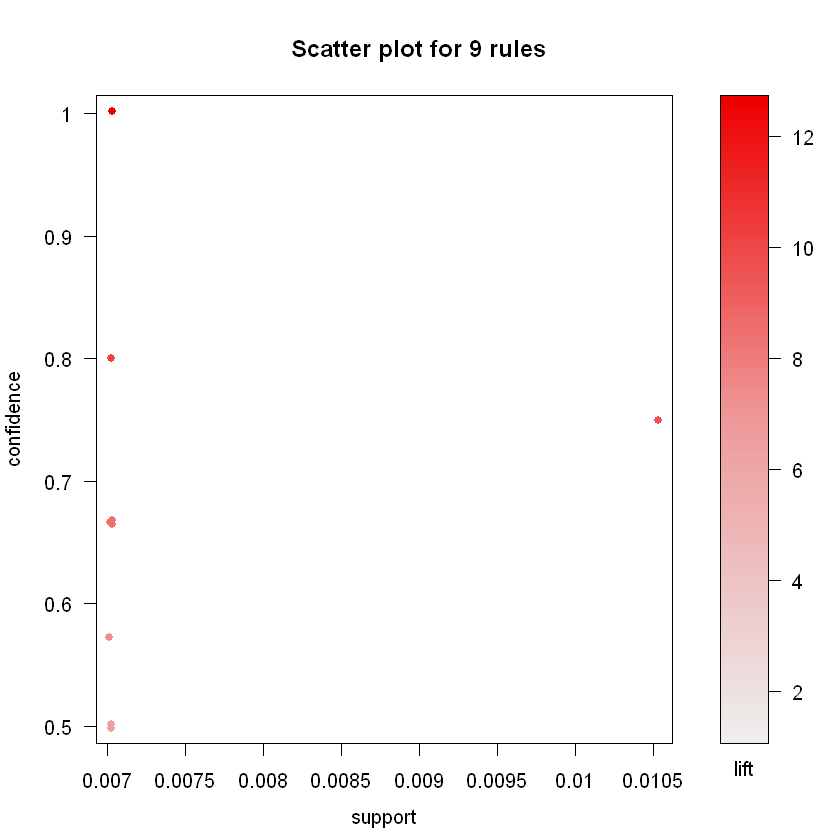

In [20]:
plot(chabior.rules,  measure=c("support", "confidence"), shading="lift")


Itemsets in Antecedent (LHS)
 [1] "{Filip_Guźla}"                       
 [2] "{Wojciech_Kalinowski}"               
 [3] "{Agata_Kulesza,Marian_Dziędziel}"    
 [4] "{Marcin_Dorociński,Marian_Dziędziel}"
 [5] "{Tomasz_Oświeciński}"                
 [6] "{Piotr_Stramowski}"                  
 [7] "{Agata_Kulesza,Marcin_Dorociński}"   
 [8] "{Krzysztof_Stelmaszyk}"              
 [9] "{Rafał_Zawierucha}"                  
[10] "{Anita_Poddębniak}"                  
[11] "{Dariusz_Chojnacki}"                 
[12] "{Roman_Gancarczyk}"                  
[13] "{Marcin_Juchniewicz}"                
[14] "{Piotr_Tołoczko}"                    
[15] "{Lech_Dyblik}"                       
[16] "{Wojciech_Machnicki}"                
[17] "{Andrzej_Deskur}"                    
[18] "{Jacek_Braciak}"                     
[19] "{Bogusław_Linda}"                    
[20] "{Marek_Kalita}"                      
[21] "{Borys_Szyc}"                        
[22] "{Daniel_Olbrychski}"                 
[23

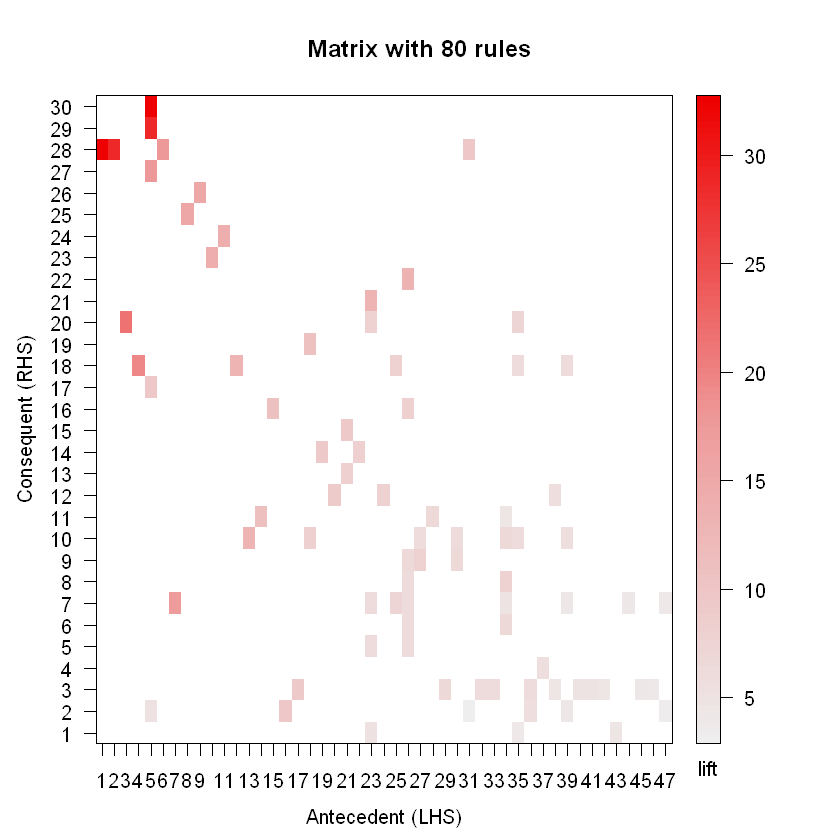

In [31]:
plot(rules, method="matrix", measure="lift")

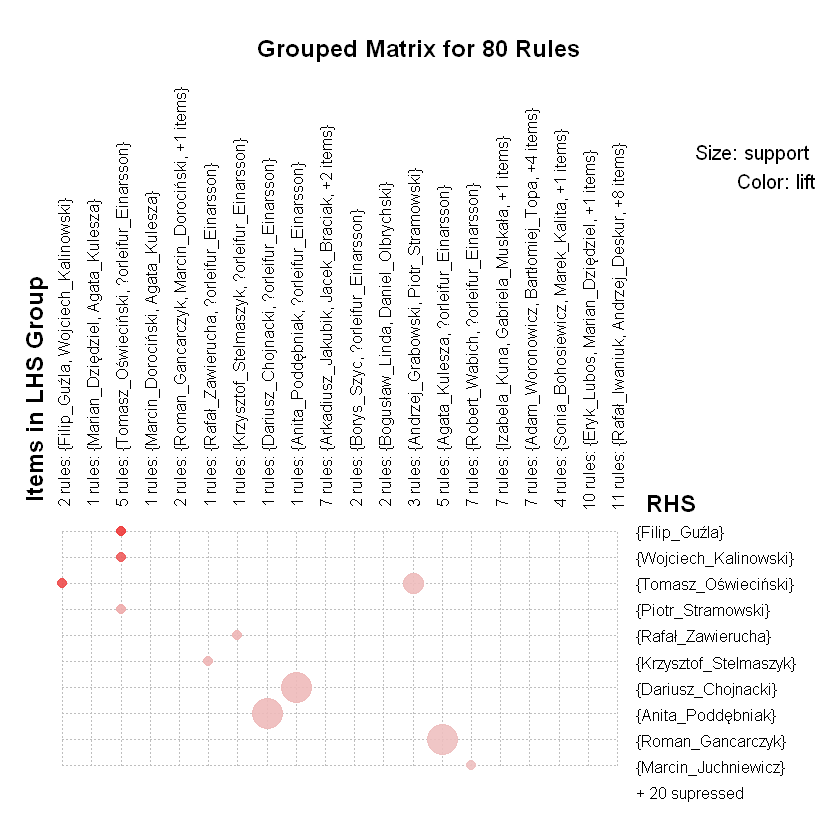

In [32]:
plot(rules, method="grouped") 

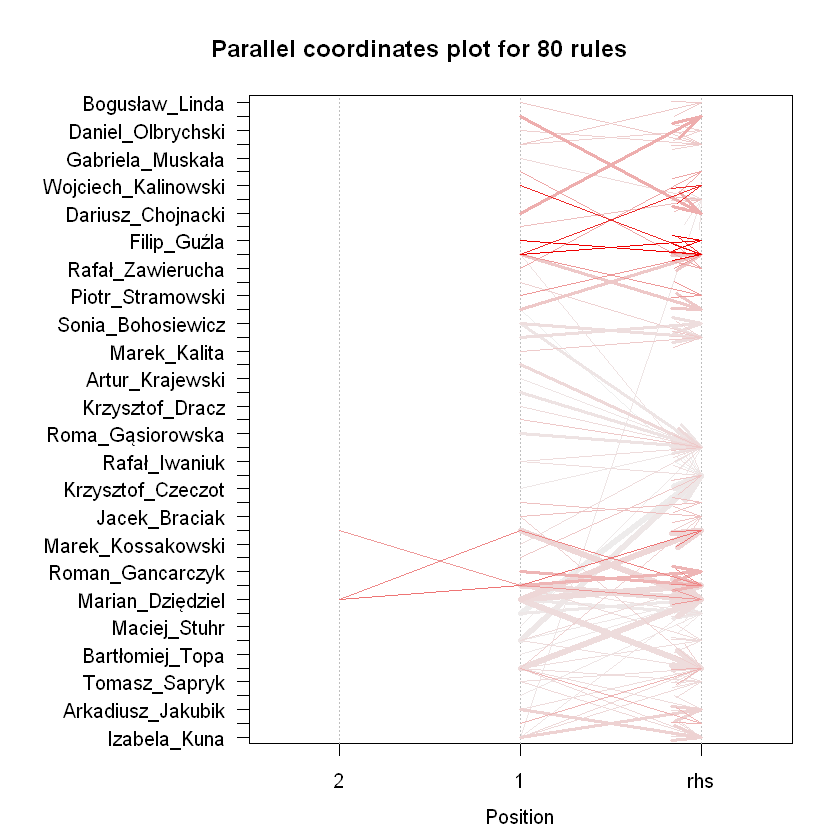

In [33]:
plot(rules, method="paracoord", control=list(reorder=TRUE))

In [38]:
df_tmp<-df[,itemFrequency(df)>0.05] # selected transactions
jaccard <- dissimilarity(df_tmp, which="items", method = "jaccard")
round(jaccard, 2) 

                   Adam_Woronowicz Andrzej_Chyra Borys_Szyc Janusz_Chabior
Andrzej_Chyra                 0.98                                        
Borys_Szyc                    0.97          0.98                          
Janusz_Chabior                0.88          0.96       0.96               
Łukasz_Simlat                 0.94          0.92       0.95           0.93
Marian_Dziędziel              0.88          0.97       0.93           0.93
Piotr_Głowacki                0.96          0.97       0.94           0.92
Przemysław_Bluszcz            0.95          1.00       0.97           0.93
                   Łukasz_Simlat Marian_Dziędziel Piotr_Głowacki
Andrzej_Chyra                                                   
Borys_Szyc                                                      
Janusz_Chabior                                                  
Łukasz_Simlat                                                   
Marian_Dziędziel            0.90                                
Piotr_Głow

In [37]:
df_tmp

transactions in sparse format with
 570 transactions (rows) and
 8 items (columns)

## Conclusions

## References
(pliska też o wpisanie tego co wrzuciłem)